# Truncated Multivariate Normal

## Bivariate Normal

Let $x$ and $y$ be distributed as a bivariate normal distribution, with means $\mu_1$ and $\mu_2$, standard deviations $\sigma_1$ and $\sigma_2$, and scale-free measure of correlation $r=\text{Cov}(x,y)/\sigma_x\sigma_y$.

Then the probability density is given by

$f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y\sqrt{1-r^2}}\exp\left[ -\frac{1}{2(1-r^2)}\left[ \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - \frac{2r(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y} \right] \right]$

Selection intensity is given by:

intensity $ = \frac{\phi\left (\Phi^{-1}(1-\xi) \right)}{\xi}$, where

$\xi = z/100$ is the fraction of the population selected ($z$ is percent)

$\phi(x)$ is the Probability Density Function (PDF) for a normal distribution \
  $\phi(x) = $ dnorm in R  
  
$\Phi(x)$ is the Cumulative Density Function (CDF) for a normal distribution \
  $\Phi(x) = $ pnorm in R 
  
$\Phi^{-1}(x)$ is the Quantile for a normal distribution \
  $\Phi^{-1}(x) = $ qnorm in R

## Matrix Formulation for Multivariate Normal

Let the $m$ variables ${\bf X}=[x_1,x_2,\dots,x_m]$ follow a multivariate normal distribution, with means ${\bf\mu}=[\mu_1,\mu_2,\dots,\mu_m]$, and $m\times m$ correlation matrix ${\bf\Sigma}=\Sigma_{i,j}=\text{Cov}(x_i,x_j)$.

Then the probability density is given by

$f({\bf X}) = \frac{1}{\sqrt{(2\pi)^m|{\bf \Sigma}|}} \exp\left[ -\frac{1}{2}\left({\bf X}-{\bf \mu}\right)^T {\bf \Sigma}^{-1}\left({\bf X}-{\bf \mu}\right)  \right]$

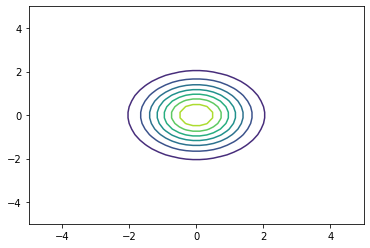

In [1]:
import numpy as np
from scipy.stats import multivariate_normal

# initialize matrices
Mu = np.array([0,0])
Cov = np.eye(2)

# create MVN distribution`
MVNdist = multivariate_normal(mean=Mu, cov=Cov)
  # x1 = 0
  # x2 = 0
  # X = np.array([x1,x2])
  # z = MVNdist.pdf(X)
  # print(z)

# ----------------------
import matplotlib.pyplot as plt 

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 40)

xs, ys= np.meshgrid(x, y)

z = MVNdist.pdf(np.dstack((xs,ys)))

# make contour plot
plt.contour(x,y,z)
plt.show()

## Truncated Normal

Integral: (1.0000000000000278, 5.257570490080354e-09)
[1.6832424671458286, 0.5066942062715994, -0.5066942062715994, -1.6832424671458286]


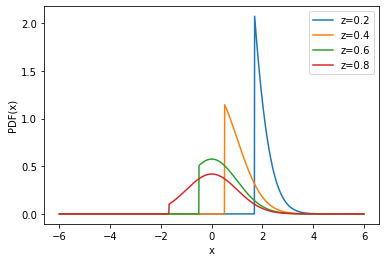

In [2]:
from scipy.stats import norm

def PDF_truncnorm(x, mu, sigma, xmin=-np.inf, xmax=np.inf):
    """
    Return probability density at x for truncated normal distribution
    defined by parameters mu, sigma
    lower/upper bounds at xmin/xmax
    """
    # PDF = 0 outside of bounds
    if (x<xmin or x>xmax):
     return 0
    
    # inside bounds
    else:
     dist = norm(loc=mu, scale=sigma)
     # dist must be renormalized such that the total integral = 1
     L = norm.cdf(xmax)-norm.cdf(xmin)
     #print(L)
    
     return norm.pdf(x)/L
    
# PDF_truncnorm(2.1,0,1,xmin=2)

# check integral
from scipy.integrate import quad
#I = quad(PDF_truncnorm, -np.inf, np.inf, args=(0,1,2))
#print("Integral: {}".format(I))

# set parameters of distribution
x1mean = 0
x1s2   = 2

# selection intensity
#  i = PDF(a)/(1-CDF(a))
#  let z = fraction selected
#  a = Quant(1-z)
#  i = PDF( Quant(1-z) ) / z
z=0.5
origdist = norm(loc=x1mean, scale=x1s2)
#intensity = origdist.pdf( origdist.ppf( 1-z ) ) / z


# plotting
fig, ax = plt.subplots()
x= np.arange(-6,6,0.01)
y1=[]
y2=[]
y3=[]
y4=[]
cutoffs = []
zs = [0.2,0.4,0.6,0.8]
for z in zs:
 cutoffs.append( origdist.ppf( 1-z ) )
#print(cutoffs)


for anx in x:
    y1.append(PDF_truncnorm(anx,x1mean,x1s2,xmin=cutoffs[0]))
    y2.append(PDF_truncnorm(anx,x1mean,x1s2,xmin=cutoffs[1]))
    y3.append(PDF_truncnorm(anx,x1mean,x1s2,xmin=cutoffs[2]))
    y4.append(PDF_truncnorm(anx,x1mean,x1s2,xmin=cutoffs[3]))
#print(x)
#print(y)
#ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('PDF(x)')
ax.plot(x, y1, label="z={}".format(zs[0]))
ax.plot(x, y2, label="z={}".format(zs[1]))
ax.plot(x, y3, label="z={}".format(zs[2]))
ax.plot(x, y4, label="z={}".format(zs[3]))
#ax.set_ylim(0,0.45)
ax.legend()
plt.show()

---------------------------------------
Truncated Bivariate Normal Distribution


In original distribution:
  -- Variable x1 --
 mean_x1: 0
 std dev: 1
  -- Variable x2 --
 mean_x2: 0
 std dev: 1
  -- Correlation --
 r = 1
---------------------------------------
Truncation Selection on x1: 70.0%
 new mean x1: 1.0490021584289069
 new mean x2: 0.3475651300897407
---------------------------------------
Selection: S_1 = mu1_selected - mu1_initial
  1.0490021584289069
Response: R_2 = mu2_selected - mu2_initial
  0.3475651300897407
Heritability h^2 = R_2/S_1
  0.3313292802088128


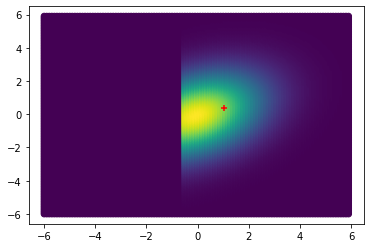

In [16]:
def PDF_trunc2Dnorm(x1, x2, mu1, mu2, sigma1, sigma2, r, xmin=-np.inf):
    """
    Return probability density at x for truncated normal distribution
    defined by parameters mu, sigma
    lower/upper bounds at xmin/xmax
    """
    # PDF = 0 outside of bounds
    if (x1<xmin):
     return 0
    
    # inside bounds - forget about renormalizing
    else:
     X   = np.array([x1,x2])
     Mu  = np.array([mu1,mu2])
     Cov = np.array(([[sigma1^2, r],[r,sigma2^2]]))
     dist = multivariate_normal(mean=Mu, cov=Cov) 
    
     return dist.pdf(X)

def PDF_trunc2Dnorm2(x1, x2, distro, xmin=-np.inf):
    """
    Return probability density at x for truncated normal distribution
    defined by parameters mu, sigma
    lower/upper bounds at xmin/xmax
    """
    # PDF = 0 outside of bounds
    if (x1 < xmin):
    #if (X[0]<xmin):
     return 0
    
    # inside bounds - forget about renormalizing
    else:
     X = np.array([x1,x2])
     return dist.pdf(X)

# some contour function magic
# vPDF = np.vectorize(PDF_trunc2Dnorm2)


# plotting

# set parameters of distribution
mu1 = 0
mu2 = 0
sigma1 = 1
sigma2 = 1
r = 1

#x1 = 0
#x2 = 0
#y = PDF_trunc2Dnorm(x1, x2, mu1, mu2, sigma1, sigma2, r, xmin=-np.inf)

# make 2D distribution 
Mu  = np.array([mu1,mu2])
Cov = np.array(([[sigma1^2, r],[r,sigma2^2]]))
dist = multivariate_normal(mean=Mu, cov=Cov) 

# find cutoff point based off 1D distribution ( of x1 )
origdist = norm(loc=mu1, scale=sigma1)
z = 0.7
cutoff = origdist.ppf(1-z)

# set up grid of input values
fig, ax = plt.subplots()
x1= np.arange(-6,6,0.1)
x2= np.arange(-6,6,0.1)

x1s = []
x2s = []
zs = []
sumweightedX1   = 0
sumweightedX2   = 0
sumweights  = 0
for anx1 in x1:
 for anx2 in x2:
  x1s.append(anx1)
  x2s.append(anx2)
  weight =  PDF_trunc2Dnorm2(anx1,anx2,dist,xmin=cutoff ) 
  sumweightedX1  += weight*anx1
  sumweightedX2  += weight*anx2
  sumweights += weight
  zs.append( weight ) 

newmeanX1 = sumweightedX1/sumweights
newmeanX2 = sumweightedX2/sumweights

ax.scatter(x1s,x2s,c=zs)

ax.scatter(newmeanX1,newmeanX2,marker="+",c='r')

print("---------------------------------------")
print("Truncated Bivariate Normal Distribution")
print("\n")
print("In original distribution:")
print("  -- Variable x1 --")
print(" mean_x1: {}".format(mu1))
print(" std dev: {}".format(sigma1))
print("  -- Variable x2 --")
print(" mean_x2: {}".format(mu2))
print(" std dev: {}".format(sigma2))
print("  -- Correlation --")
print(" r = {}".format(r))
print("---------------------------------------")
print("Truncation Selection on x1: {}%".format(z*100))
print(" new mean x1: {}".format(newmeanX1))
print(" new mean x2: {}".format(newmeanX2))
print("---------------------------------------")
print("Selection: S_1 = mu1_selected - mu1_initial")
print("  {}".format(newmeanX1-mu1))
print("Response: R_2 = mu2_selected - mu2_initial")
print("  {}".format(newmeanX2-mu2))
print("Heritability: h^2 = R_2/S_1")
print("  {}".format((newmeanX2-mu2)/(newmeanX1-mu1)))



In [4]:
# Contour Plotting Example
#import numpy as np
#import matplotlib.cm as cm
#import matplotlib.pyplot as plt
#
#
#delta = 0.025
#x = np.arange(-3.0, 3.0, delta)
#y = np.arange(-2.0, 2.0, delta)
#X, Y = np.meshgrid(x, y)
#Z1 = np.exp(-X**2 - Y**2)
#Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
#Z = (Z1 - Z2) * 2
#
#fig, ax = plt.subplots()
#CS = ax.contour(X, Y, Z)
#ax.clabel(CS, inline=True, fontsize=10)
#ax.set_title('Simplest default with labels')